# Analyzing food insecurity factors influence diabetes rate across Missouri Counties.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as mat
from sklearn import linear_model

# Reading the Data

In [4]:
df = pd.read_csv('MO_County_Data_CSV_DSA7010_Project_Data.csv')
df.head()

,cnty_fips,cnty_name,povpct,pop_2014,pop_densit,age_lt18,pct_age_lt,age_18_65,pct_age_18,age_gt_65,...,COVVac1Dos,COVFullVac,PctCOV1Dos,PctCOVFull,Cen2000PR,Cen2010PR,AllC_AAIRt,AllC_AvAnC,AllC_Statu,AllC_Rec5Y
0,29001,Adair,26.9,25602,44.864523,4759,18.6,17400,68.0,3443,...,9899,8783,0.39,0.35,0.79,0.81,456.3,116,stable,0.0
1,29003,Andrew,10.7,17379,39.784793,4020,23.1,10393,59.8,2967,...,5414,4879,0.31,0.28,0.81,0.79,427.3,98,stable,-0.1
2,29005,Atchison,12.2,5382,9.795111,1078,20.0,3046,56.6,1258,...,2364,2131,0.45,0.40,0.77,0.74,393.4,32,stable,-0.9
3,29007,Audrain,17.2,25887,37.117682,6068,23.4,15554,60.1,4265,...,8465,7161,0.33,0.28,0.79,0.80,464.9,148,falling,-1.0
4,29009,Barry,20.2,35662,45.068915,8321,23.3,20248,56.8,7093,...,14197,11608,0.40,0.33,0.69,0.60,386.1,196,stable,-0.7


Some of the attributes I will be working with are as follows:
-------------------------------------------------------------------------------------------------------
cnty_name: Name of the county in Missouri

limit_food: Percentage of Population with Limited food accessibility

food_insec: Percentage of Population with no reliable food source

P_Disab: Percentage of Population with Disabilities

Diabetes: Diabetes rate/percentage

GiniIndex: Measure of Income inequality

Population: Total population

pct_unempl: Unemployment Percentage

P_BPovLev: Percentage of Population under Poverty Line

E_EDUC_LTH: Population with an Education level less than High school

pcp_per_ca: PCP per Capita (Using it as a measure of access to Health care service)

In [5]:
test_col = ['cnty_name','limit_food','food_insec','P_Disab','Diabetes','GiniIndex','Population','pct_unempl','P_BPovLev','E_EDUC_LTH','pcp_per_ca',] 
df = df[test_col]

In [6]:
df.sort_values(by = 'Population', ascending=False)

,cnty_name,limit_food,food_insec,P_Disab,Diabetes,GiniIndex,Population,pct_unempl,P_BPovLev,E_EDUC_LTH,pcp_per_ca
95,St. Louis County,5,16,14.2,9.7,0.490,994205,6.5,8.5,46247,0.001201
91,St. Charles,5,11,12.2,7.1,0.398,402022,5.6,5.0,13874,0.000464
47,Jackson,7,18,16.3,10.2,0.466,383230,7.5,12.8,45492,0.000729
114,St. Louis City,5,26,18.2,11.5,0.508,300576,9.1,20.6,28768,0.000797
38,Greene,6,16,18.0,10.5,0.466,293086,5.4,17.2,15773,0.001018
...,...,...,...,...,...,...,...,...,...,...,...
97,Schuyler,32,17,20.8,11.4,0.449,4660,6.4,14.6,425,0.000458
43,Holt,36,14,21.0,12.1,0.405,4403,4.8,12.2,301,0.000443
51,Knox,11,15,26.4,14.3,0.461,3959,4.5,17.1,320,0.001000
64,Mercer,5,14,18.8,5.5,0.409,3617,4.9,11.9,251,0.000269


In [7]:
#Checking to see if columns that Have NaN/null values.
nan_rows = df.isnull().sum()

nan_rows

cnty_name     0
limit_food    0
food_insec    0
P_Disab       0
Diabetes      0
GiniIndex     0
Population    0
pct_unempl    0
P_BPovLev     0
E_EDUC_LTH    0
pcp_per_ca    0
dtype: int64

In [8]:
#To check the data types of each column
df.dtypes

cnty_name      object
limit_food      int64
food_insec      int64
P_Disab       float64
Diabetes      float64
GiniIndex     float64
Population      int64
pct_unempl    float64
P_BPovLev     float64
E_EDUC_LTH      int64
pcp_per_ca    float64
dtype: object

In [9]:
#To see the basic stats of each column
df.describe()

,limit_food,food_insec,P_Disab,Diabetes,GiniIndex,Population,pct_unempl,P_BPovLev,E_EDUC_LTH,pcp_per_ca
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,7.704348,15.469565,21.780000,11.168696,0.435409,48618.495652,6.493043,14.786087,3743.730435,0.000434
std,6.233714,2.099798,5.116334,3.672548,0.029926,111587.809680,1.159909,4.422012,6772.749635,0.000284
min,0.000000,11.000000,12.200000,1.800000,0.375000,2013.000000,4.100000,5.000000,191.000000,0.000000
25%,3.500000,14.000000,18.000000,8.650000,0.412000,10063.000000,5.700000,11.800000,981.500000,0.000221
50%,6.000000,15.000000,21.000000,10.900000,0.432000,18302.000000,6.400000,14.300000,2046.000000,0.000388
75%,10.000000,16.500000,25.350000,13.500000,0.457500,38973.500000,7.300000,17.500000,3916.000000,0.000603
max,36.000000,26.000000,37.900000,21.200000,0.513000,994205.000000,10.000000,28.000000,46247.000000,0.001250


# Data Carpentry 

In [10]:
#Finding population size from percentage value

#Diabeties
df['Pop_Diabetes'] = ((df['Population']*df['Diabetes'])/100).astype('int')

In [11]:
#Limtied food access
df['Pop_foodlim'] = ((df['Population']*df['limit_food'])/100).astype('int')

#Food insecurity 
df['Pop_foodins'] = ((df['Population']*df['food_insec'])/100).astype('int')

In [12]:
#Disabled Population
df['Pop_disab'] = ((df['Population']*df['P_Disab'])/100).astype('int')

#Unemployed Population
df['Pop_Unemp'] = ((df['Population']*df['pct_unempl'])/100).astype('int')

#Below poverty line population
df['Pop_PovL'] = ((df['Population']*df['P_BPovLev'])/100).astype('int')

In [13]:
#PCP per 10000 people
df['PCP10000'] = (df['pcp_per_ca']*10000).astype('int')

In [14]:
#Renaming a column
#Population with Education less than HighSchool
df['Pop_LTHs'] = df['E_EDUC_LTH']

In [15]:
#Rearranging the columns and removing percentage columns that won't be needed.
ndf = df[['cnty_name','GiniIndex','Pop_Diabetes','Pop_disab','Pop_LTHs','Pop_Unemp','Pop_PovL','Pop_foodins','Pop_foodlim','PCP10000']]

In [16]:
ndf.head()

,cnty_name,GiniIndex,Pop_Diabetes,Pop_disab,Pop_LTHs,Pop_Unemp,Pop_PovL,Pop_foodins,Pop_foodlim,PCP10000
0,Adair,0.513,2078,4156,1263,1368,7096,4308,2280,12
1,Andrew,0.415,1788,3064,972,850,1523,1948,708,1
2,Atchison,0.417,992,1131,369,267,493,668,102,3
3,Audrain,0.439,3605,5153,2555,1472,3427,3808,1777,6
4,Barry,0.451,3757,7873,4378,2075,6334,5010,1073,5


# EDA

In [17]:
#Finding the relations each attribute has with each other:
#Using the corr() function
ndf.corr()

,GiniIndex,Pop_Diabetes,Pop_disab,Pop_LTHs,Pop_Unemp,Pop_PovL,Pop_foodins,Pop_foodlim,PCP10000
GiniIndex,1.000000,0.193939,0.218516,0.240640,0.201044,0.312396,0.242879,0.193493,0.364845
Pop_Diabetes,0.193939,1.000000,0.992653,0.920250,0.990764,0.933685,0.986282,0.953399,0.409898
Pop_disab,0.218516,0.992653,1.000000,0.928515,0.990684,0.947527,0.988043,0.958590,0.425253
Pop_LTHs,0.240640,0.920250,0.928515,1.000000,0.932772,0.917103,0.929438,0.894048,0.385396
Pop_Unemp,0.201044,0.990764,0.990684,0.932772,1.000000,0.930143,0.992464,0.948143,0.388025
Pop_PovL,0.312396,0.933685,0.947527,0.917103,0.930143,1.000000,0.959860,0.923569,0.472989
Pop_foodins,0.242879,0.986282,0.988043,0.929438,0.992464,0.959860,1.000000,0.948930,0.414205
Pop_foodlim,0.193493,0.953399,0.958590,0.894048,0.948143,0.923569,0.948930,1.000000,0.430313
PCP10000,0.364845,0.409898,0.425253,0.385396,0.388025,0.472989,0.414205,0.430313,1.000000


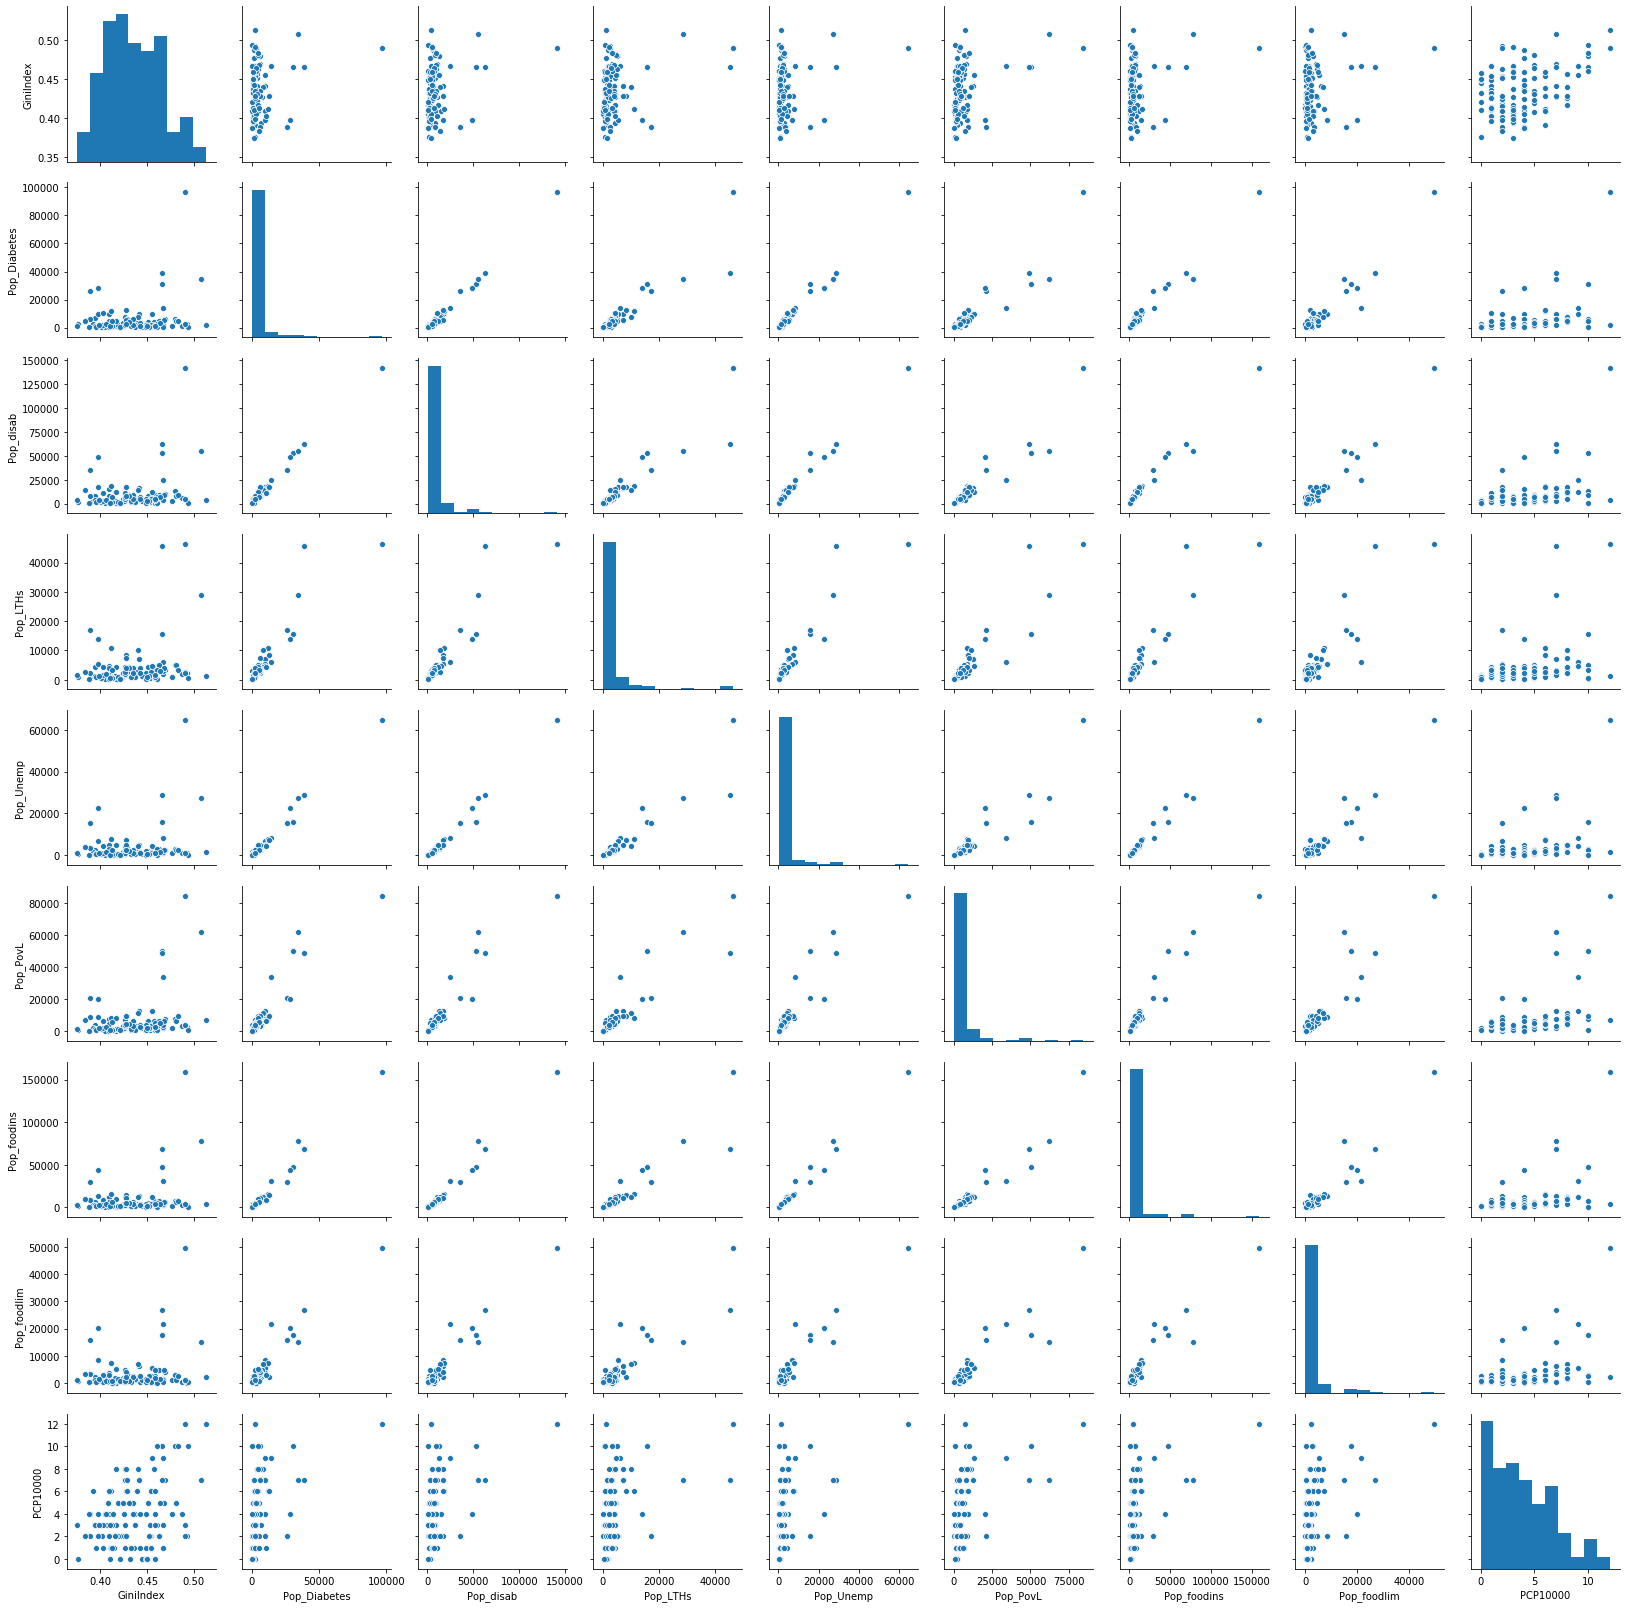

In [18]:
#using the pairplot() function
sns.pairplot(ndf)

Here is what I have found:

1) Pop_disab has the strongest correlation with diabetes, followed by Pop_Unemp.

2) PCP10000 (used as a measure of access to healthcare services) has a positive weak correlation.


For the case of Pop_disab, it would make sense since people with disabilities are more likely to have diabetes than people without disabilities. The visualization below confirms this. As the number of people with disabilities increases, so does the rate of diabetes.

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


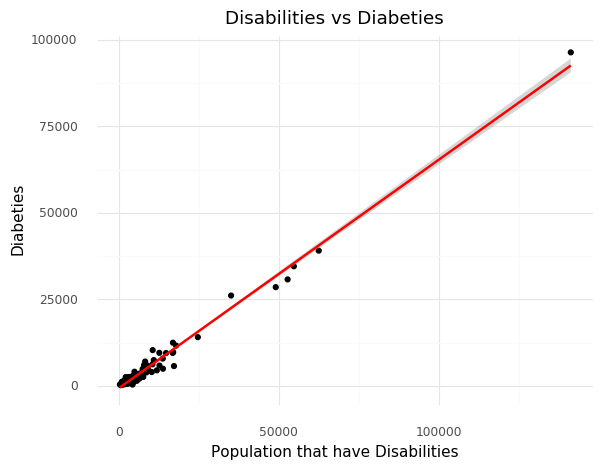

<ggplot: (8747550967230)>

In [19]:
#Visualizing the Disabilites vs Diabeties
ggplot(ndf,aes('Pop_disab','Pop_Diabetes'))+ geom_point() + theme_minimal() + geom_smooth(method = 'lm', color = 'red') \
    + labs(title = 'Disabilities vs Diabeties ', x= 'Population that have Disabilities ',y = 'Diabeties') 

A similar trend was also seen with the population that are unemployed. Lack of a job would mean no steady income and, as a result, no access to nutritious food.

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


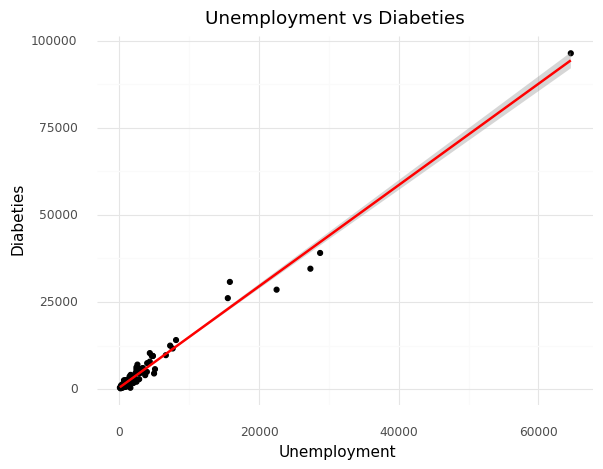

<ggplot: (8747551239509)>

In [20]:
#Visualizing the Unemployment vs Diabeties
ggplot(ndf,aes('Pop_Unemp','Pop_Diabetes'))+ geom_point() + theme_minimal() + geom_smooth(method = 'lm', color = 'red') \
    + labs(title = 'Unemployment vs Diabeties ', x= 'Unemployment',y = 'Diabeties') 

In both the plots, some points fall under the regression line, indicating that unemployment/disabilities on their own as factors are not enough to influence the diabetes rate in some counties.

What about access to health care?

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


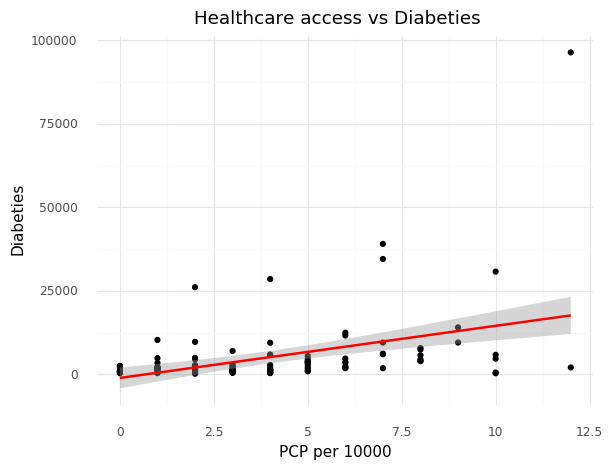

<ggplot: (8747550905899)>

In [21]:
#Visualizing the Healthcare access vs Diabeties
ggplot(ndf,aes('PCP10000','Pop_Diabetes'))+ geom_point() + theme_minimal() + geom_smooth(method = 'lm', color = 'red') \
   + labs(title = 'Healthcare access vs Diabeties', x= 'PCP per 10000 ',y = 'Diabeties') 


Looking at the plot, a good amount of the points are under the regression line. Indicates that the diabetes rate didn't increase as much as expected in counties where healthcare access is easier. That being said,  counties with larger populations and lesser access to healthcare show higher diabetes rates.

In [22]:
ndf.sort_values(by = 'Pop_Diabetes', ascending=False)

,cnty_name,GiniIndex,Pop_Diabetes,Pop_disab,Pop_LTHs,Pop_Unemp,Pop_PovL,Pop_foodins,Pop_foodlim,PCP10000
95,St. Louis County,0.490,96437,141177,46247,64623,84507,159072,49710,12
47,Jackson,0.466,39089,62466,45492,28742,49053,68981,26826,7
114,St. Louis City,0.508,34566,54704,28768,27352,61918,78149,15028,7
38,Greene,0.466,30774,52755,15773,15826,50410,46893,17585,10
91,St. Charles,0.398,28543,49046,13874,22513,20101,44222,20101,4
...,...,...,...,...,...,...,...,...,...,...
112,Worth,0.388,392,380,191,82,263,261,201,4
70,Morgan,0.467,371,4331,2945,1588,4063,3300,206,1
101,Shelby,0.421,343,1126,413,314,705,889,889,0
98,Scotland,0.494,338,955,713,235,651,686,343,10


St. Louis County and Jackson County have the highest diabetes rates. Both exhibited a low PCP per capita(PCP per 10000 people) and high rates of unemployment and disability.

# Building a Model to Predict Diabetes Rate.

In [23]:
train = ndf.sample(frac = 7/10, random_state = 1)
test = ndf.drop(train.index)
lm = linear_model.LinearRegression()

In [24]:
train.head()

,cnty_name,GiniIndex,Pop_Diabetes,Pop_disab,Pop_LTHs,Pop_Unemp,Pop_PovL,Pop_foodins,Pop_foodlim,PCP10000
94,St. Francois,0.428,5713,17274,7265,5108,9880,11426,4032,8
44,Howard,0.401,580,2170,761,560,1280,1500,1100,3
56,Lincoln,0.403,10327,10622,4273,4366,6727,8261,2950,1
83,Polk,0.429,3600,6686,2522,2089,4500,5465,964,6
69,Montgomery,0.398,1235,2425,1294,808,1651,1732,577,2


First iteration:

For the first model, only attributes such as Disabled Population, Unemployed Population, and Measure of Access to Healthcare services were used.

In [25]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_disab','Pop_Unemp','PCP10000']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_disab','Pop_Unemp','PCP10000']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm .fit(train_x,train_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))

R-Squared with training data: 0.9905287888080418
R-Squared with testing data: 0.8848080165074022


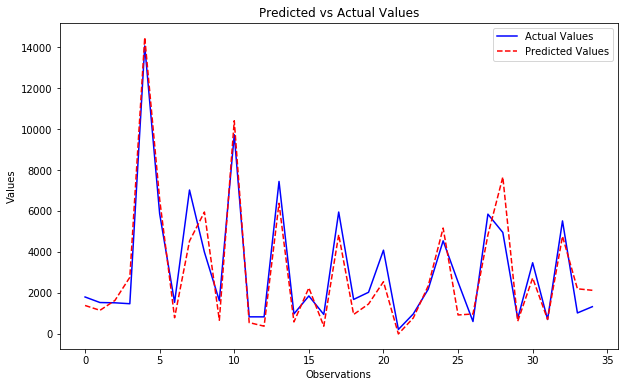

In [26]:
pred = lm.predict(test_x)
pred
mat.figure(figsize=(10, 6))
mat.plot(test_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()
mat.show()

The R-squared results are good, the data seems to fit the model well, and the predictions are close to the observed values.

More attributes will be added to check if the predictions can improve.

Second Interation:

Attributes used: Disabled Population, Unemployed Population, Measure of Access to Healthcare Services, and Limited food accessibility.

R-Squared with training data: 0.9906394454408236
R-Squared with testing data: 0.8798115482907692


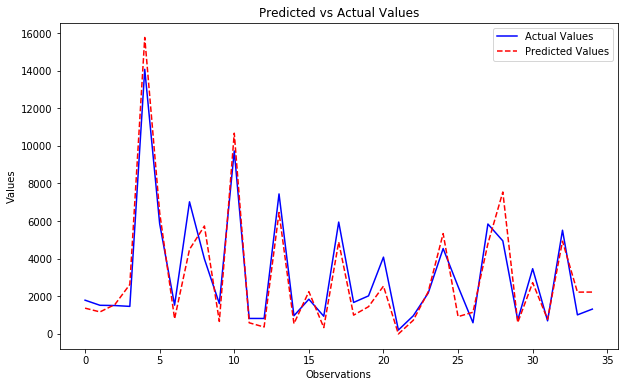

In [27]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_disab','Pop_Unemp','PCP10000','Pop_foodlim']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_disab','Pop_Unemp','PCP10000','Pop_foodlim']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm = linear_model.LinearRegression()
lm.fit(train_x,train_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))
pred = lm.predict(test_x)
pred
mat.figure(figsize=(10, 6))
mat.plot(test_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()
mat.show()

Third Iteration: 

Attributes used:  Disabled Population,  Population with less than High School Education, Measure of Access to Healthcare Services, and Limited food accessibility.

R-Squared with training data: 0.9892779706005601
R-Squared with testing data: 0.8039338792929591


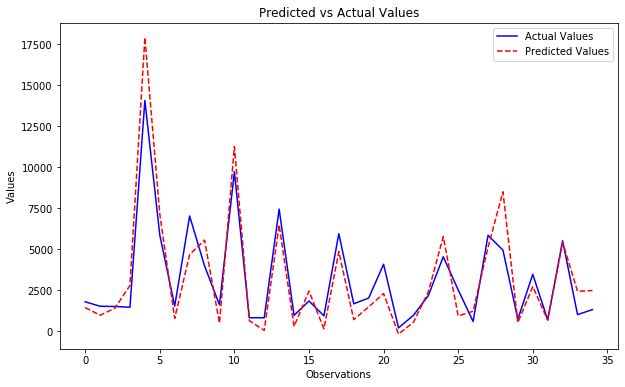

In [28]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_disab','Pop_foodlim','PCP10000','Pop_LTHs']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_disab','Pop_foodlim','PCP10000','Pop_LTHs']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm = linear_model.LinearRegression()
lm .fit(train_x,train_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))
pred = lm.predict(test_x)
pred
mat.figure(figsize=(10, 6))
mat.plot(test_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()
mat.show()

Fourth Iteration:

Attributes used:  Gini Index, Unemployed Population, Measure of Access to Healthcare Services, Limited food accessibility, Population with Less Than High School Education, and Population under the Poverty Line.

R-Squared with training data: 0.9879187613014886
R-Squared with testing data: 0.7357437152018383


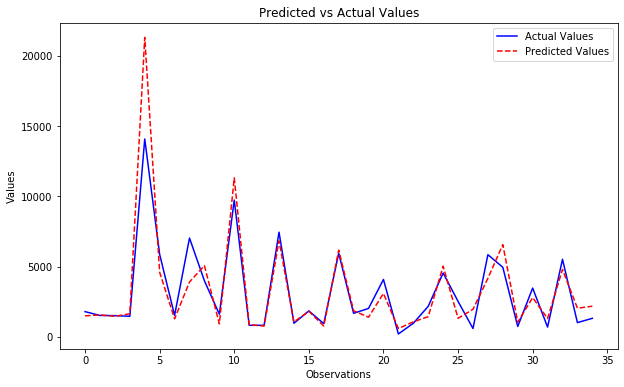

In [29]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_foodlim','Pop_Unemp','PCP10000','GiniIndex','Pop_LTHs','Pop_PovL']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_foodlim','Pop_Unemp','PCP10000','GiniIndex','Pop_LTHs','Pop_PovL']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm = linear_model.LinearRegression()
lm .fit(train_x,train_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))
pred = lm.predict(test_x)
pred
mat.figure(figsize=(10, 6))
mat.plot(test_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()
mat.show()

Fifth Iteration:

Attributes used: Unemployed Population, Measure of Access to Healthcare Services, Disabled Population, and Population under the Poverty Line.

R-Squared with training data: 0.9907638346245791
R-Squared with testing data: 0.8802817380631653


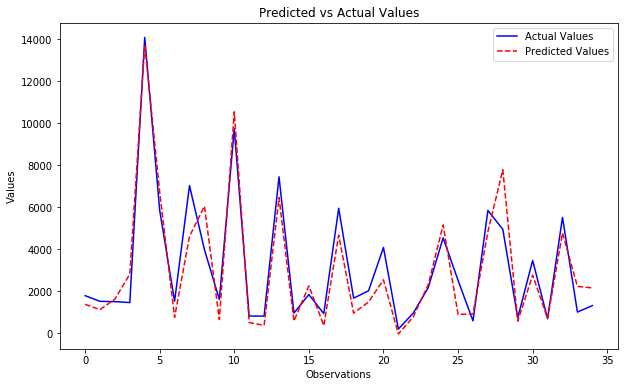

In [30]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_disab','Pop_Unemp','PCP10000','Pop_PovL']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_disab','Pop_Unemp','PCP10000','Pop_PovL']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm = linear_model.LinearRegression()
lm .fit(train_x,train_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))
pred = lm.predict(test_x)
pred
mat.figure(figsize=(10, 6))
mat.plot(test_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()
mat.show()

Final Model:
-------------------
For the final model, I will use only use the attributes that provide the best R-squared values.

Attributes used: Disabled Population, Unemployed Population, Measure of Access to Healthcare Services, and Gini Index.

In [31]:
#Setting up test and training data
Finaltrain_x = np.asarray(train[['Pop_disab','Pop_Unemp','PCP10000','GiniIndex']])
Finaltrain_y = np.asarray(train.Pop_Diabetes)


Finaltest_x = np.asarray(test[['Pop_disab','Pop_Unemp','PCP10000','GiniIndex']])
Finaltest_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
Flm = linear_model.LinearRegression()
Flm.fit(Finaltrain_x, Finaltrain_y)

#Varience score: with training data set
print('R-Squared with training data: {}'.format(Flm.score(Finaltrain_x, Finaltrain_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(Flm.score(Finaltest_x, Finaltest_y)))

R-Squared with training data: 0.990664616874828
R-Squared with testing data: 0.8930688989051216


In [32]:
pred = Flm.predict(Finaltest_x)

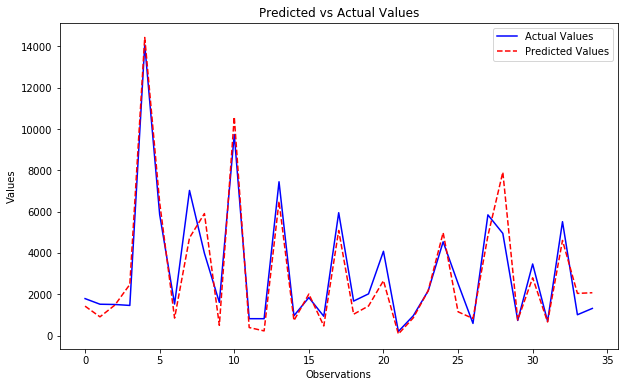

In [33]:
mat.figure(figsize=(10, 6))
mat.plot(Finaltest_y, label='Actual Values', color='blue')
mat.plot(pred, label='Predicted Values', color='red', linestyle='--')
mat.title('Predicted vs Actual Values')
mat.xlabel('Observations')
mat.ylabel('Values')
mat.legend()

To check if the distribution is normal:

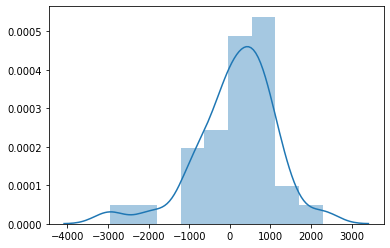

In [34]:
residual = Finaltest_y - pred
sns.distplot(residual)

The plot shows a bell-shaped curve, which indicates a normal distribution.
It also shows that data fit the model well, and predicted values will be close to the actual values. 

Model to predict Diabetes rate using consolidated attribute:
-------------------------------------------------------------------------------------

In [35]:
#Setting up test and training data
train_x = np.asarray(train[['Pop_foodins']])
train_y = np.asarray(train.Pop_Diabetes)


test_x = np.asarray(test[['Pop_foodins']])
test_y = np.asarray(test.Pop_Diabetes)

#Create a linear regression model
lm = linear_model.LinearRegression()
lm.fit(train_x,train_y)
#Varience score: with training data set
print('R-Squared with training data: {}'.format(lm.score(train_x, train_y)))

#Varience score: with test data set
print('R-Squared with testing data: {}'.format(lm.score(test_x, test_y)))
con_pred = lm.predict(test_x)

R-Squared with training data: 0.975242240902976
R-Squared with testing data: 0.854221513372095


# Final visualization

With the predicted values of the final model, I wanted to compare it against the actual values using the consolidated food attribute 'Pop_foodins.'

(Pop_foodins attribute represents the population facing Food insecurity and is calculated from "food_insec")

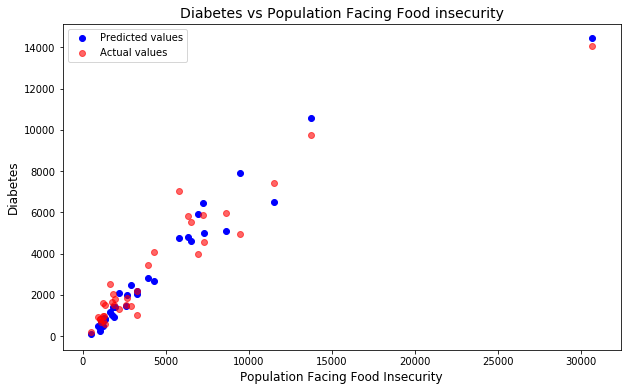

In [36]:
mat.figure(figsize=(10,6))
mat.scatter(test['Pop_foodins'], pred, color='blue', label='Predicted values')
mat.scatter(test['Pop_foodins'], test['Pop_Diabetes'], color='red', label='Actual values', alpha=0.6)
mat.title('Diabetes vs Population Facing Food insecurity', fontsize=14)
mat.xlabel('Population Facing Food Insecurity', fontsize=12)
mat.ylabel('Diabetes', fontsize=12)
mat.legend()

For the final model,  the factors used were the number of unemployed people, the number of people with disabilities, PCP per capita, and the Gini Index. The R-squared value was 0.893 and has been the highest so far.
Since the predicted values are close to the actual values, the factors used in the final model can be considered good predictors. Other factors can play a role in making predictions. I just found this combination of factors to work the best.

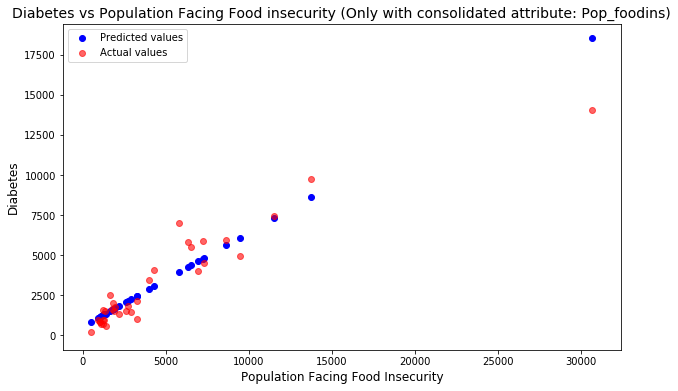

In [37]:
mat.figure(figsize=(10,6))
mat.scatter(test['Pop_foodins'], con_pred, color='blue', label='Predicted values')
mat.scatter(test['Pop_foodins'], test['Pop_Diabetes'], color='red', label='Actual values', alpha=0.6)
mat.title('Diabetes vs Population Facing Food insecurity (Only with consolidated attribute: Pop_foodins)', fontsize=14)
mat.xlabel('Population Facing Food Insecurity', fontsize=12)
mat.ylabel('Diabetes', fontsize=12)
mat.legend()

Another separate model was built using only the “food_insec” attribute, resulting in an R-squared value of 0.854. This indicated that the attributes used in the final model are much better at predicting diabetes rates. But interestingly, there is a much more linear trend seen in the plot. This would mean both diabetes and food insecurity have a strong positive correlation. 

In conclusion, a combination of factors such as the population that is unemployed, the population that has disabilities, PCP per capita, and income disparity has a strong influence over diabetes rates across the counties of Missouri.  As such, it can be used to make accurate predictions on diabetes rates.

# Who is the intended audience?

Governmental bodies and health organizations can use this analysis to better assist counties by setting up support programs that provide unemployment aid and disability benefits to reduce financial burdens and improve health outcomes. They can also invest more in programs that arrange free health check-ups and promote healthy lifestyle choices. Furthermore, health organizations can use this to increase the number of primary care physicians in underserved areas, improving healthcare access.

# Closing thoughts 

Why did I choose the topic for analysis? What made it unique? Why would you consider it a data science project?

I chose this topic because it discusses the rising concerns of diabetes in an area filled with diverse socioeconomic difficulties. This analysis can provide insight to local leaders, allowing them to set up better programs to support the less fortunate. By understanding how certain factors of food insecurity contribute to diabetes, policies can be set up to help at-risk communities. This analysis also promotes collaboration between government, health institutes, and local communities to find solutions for better access to food and health.  

This topic is unique since it delves into the complex relationship between food insecurity and diabetes. It was interesting to see how factors like income, employment, and accessibility to health contribute to diabetes, offering insight beyond the traditional medical factors. 

This analysis is most definitely a data science project. Getting to the conclusion required large amounts of data to be collected, cleaned, and preprocessed. To make sense of the data, I analyzed and used Machine learning models and visualizations. Finally, I presented the relationships in the data in a bite-sized format that is easily understood by everyone. 

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>

# Project Definition, Requirements, & Expectations stage


This stage requires me to come up with a well-defined problem statement. Since the dataset is new to me, I had to use the metadata quite a lot to dig deeper into the dataset to understand what I was going to work with. 
For this project, I planned to analyze the influence of socioeconomic, health resources, and accessibility factors of food insecurity on diabetes rates across Missouri Counties.

# Data Acquisition, Governance, Curation & Source code Management

For my final assignment, my professor provided me with the dataset. All the codes and data were handled/managed in this Jupyter Notebook.

# Data Shaping and Carpentry

During this phase, I loaded, cleaned, and preprocessed the data. I checked to see if there were any null values. New columns were created with transformed existing data. All of these were done to make the analysis process much easier.

# Exploratory Data Visualization

During this phase, I used functions such as corr() and pairplot() to find trends and relations between the variables. Allowing me to identify key factors and understand how each factor affected the diabetes rates within counties.

# Machine learning model,planning, building, testing

During this phase, I decided that linear regression models would be the best fit for predicting diabetes rates. I planned to use a combination of factors to see how close the predicted values are to the observed values and highlight the factors that seem to influence the outcome more than others.

# Machine learning model, validation , visualization, interpretation

During this phase, multiple model iterations were observed, each with a different combination of factors. Model results were analyzed, and visualizations were made, improving my understanding of the factors influencing diabetes rates. A residual test was conducted on the final model to check its quality and validity. 

# Data story & reporting

During this phase, I used visualizations to provide a summary of my data story, discussing the steps I took, the results I found, and what I interpreted from it. I also mentioned the significance of this analysis. 

# Machine learning model deployment and monitoring

The deployment of trained models plays a crucial role in real-world applications. Its prediction can help drive decisions forward. In this case, policymakers and health institutions can use these predictions to allocate resources more effectively, provide aid and benefits to those who need it, invest more in healthcare infrastructures, etc.
In short, a well-trained and monitored model can guide policymakers and health institutions to develop effective strategies to combat food insecurity and improve overall health outcomes.